In [233]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-04-08 22:15:01--  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3,8M) [application/x-httpd-php]
Saving to: ‘adult.data.1’

adult.data.1        100%[===================>]   3,79M   349KB/s    in 11s     

2019-04-08 22:15:13 (350 KB/s) - ‘adult.data.1’ saved [3974305/3974305]



In [3]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [5]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [75]:
df = pd.read_csv("adult.data", delimiter=', ', names=cols)

/home/olegiwe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [76]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [204]:
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
2128,44,Local-gov,145178,HS-grad,9,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,38,Jamaica,>50K
21175,74,State-gov,117017,Some-college,10,Separated,Sales,Not-in-family,White,Male,0,0,16,United-States,<=50K
30639,47,Private,168232,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,7298,0,40,United-States,>50K
14248,39,Self-emp-inc,206253,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,<=50K
21718,22,Private,153805,HS-grad,9,Never-married,Other-service,Unmarried,Other,Male,0,0,20,Puerto-Rico,<=50K
12010,20,State-gov,178517,Some-college,10,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
12381,44,State-gov,691903,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,60,United-States,>50K
27396,38,Federal-gov,201617,HS-grad,9,Never-married,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
31126,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
24697,33,Private,134886,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K


# Сколько мужчин и женщин?

In [78]:
df["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [79]:
df.groupby(['sex']).age.mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [91]:
df.loc[df['native-country'] == 'United-States'].shape[0] / df.shape[0]

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

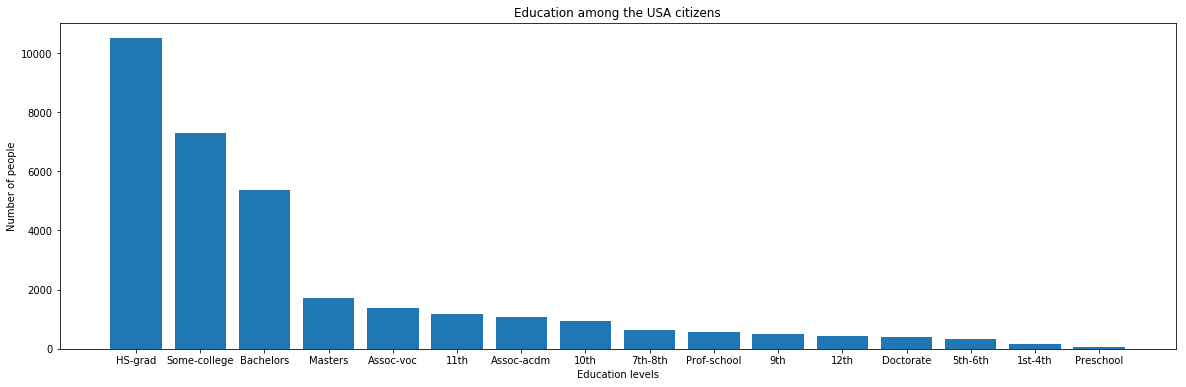

In [150]:
N = df['education'].value_counts()
plt.figure(figsize=(20, 6))
plt.xlabel('Education levels')
plt.ylabel('Number of people')
plt.title('Education among the USA citizens')
fig = plt.bar(N.index, N.values)

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [160]:
fnl_m = df.loc[df['marital-status'] == 'Divorced'].fnlwgt.mean()
fnl_s = df.loc[df['marital-status'] == 'Divorced'].fnlwgt.std() 
print(fnl_m, fnl_s)

185802.79045689848 105646.78945933603


(array([20., 25., 27., 40., 59., 42., 26., 16., 25., 31., 37., 26., 21.,
        21., 18., 23., 16., 26., 31., 24., 27., 32., 19., 31., 22., 38.,
        57., 61., 62., 61., 53., 52., 50., 74., 49., 34., 49., 38., 41.,
        39., 48., 54., 57., 44., 54., 43., 58., 45., 69., 60., 70., 75.,
        78., 97., 62., 65., 82., 83., 87., 72., 55., 69., 60., 53., 55.,
        34., 51., 47., 42., 50., 38., 26., 29., 43., 35., 33., 24., 32.,
        26., 20., 28., 27., 23., 20., 21., 27., 22., 17., 22., 15., 22.,
        16., 19.,  7., 19., 14., 16., 17., 16.,  6., 16., 26., 14., 14.,
        14., 21.,  7.,  8., 15., 21., 22., 24., 10., 15.,  7., 16.,  6.,
         8., 13.,  7.,  7., 11.,  8.,  7.,  7.,  6., 11.,  5.,  4.,  5.,
         5.,  5.,  7.,  7.,  2.,  4.,  6.,  6.,  6.,  2.,  2.,  3.,  4.,
         3.,  4.,  2.,  1.,  2.,  1.,  3.,  3.,  2.,  0.,  2.,  3.,  2.,
         0.,  3.,  3.,  2.,  1.,  0.,  0.,  4.,  1.,  0.,  3.,  3.,  1.,
         1.,  1.,  1.,  0.,  2.,  0.,  0.,  0.,  2.

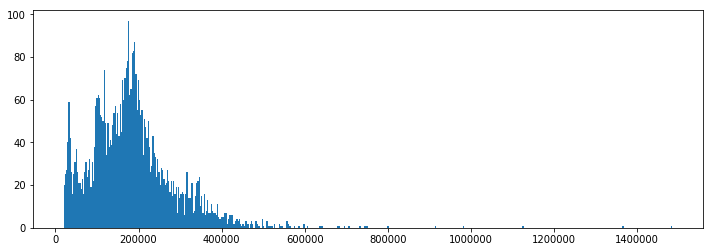

In [238]:
plt.figure(figsize=(12, 4))
#plt.hist(df.loc[df['marital-status'] == 'Divorced'].fnlwgt.apply(lambda x: np.log(x)), bins=500)
plt.hist(df.loc[df['marital-status'] == 'Divorced'].fnlwgt, bins=500)

> Ответ: оно мне напоминает логнормальное распределение
> 
>(проверка закомментирована)

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [181]:
df.loc[(df['result'] == '>50K') & (df['education'].isin(['Bachelors', 'Masters', 'Doctorate']))].shape[0] / df.loc[df['result'] == '>50K'].shape[0]

0.4445861497258003

> Ответ: Правда / Нет.

> Нет

# Сколько в среднем работают люди в неделю в зависимости от education?

In [191]:
df.groupby(['education'])['hours-per-week'].mean()

education
10th            37.052519
11th            33.925957
12th            35.780600
1st-4th         38.255952
5th-6th         38.897898
7th-8th         39.366873
9th             38.044747
Assoc-acdm      40.504217
Assoc-voc       41.610709
Bachelors       42.614006
Doctorate       46.973366
HS-grad         40.575374
Masters         43.836332
Preschool       36.647059
Prof-school     47.425347
Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [194]:
df.groupby(['sex'])['hours-per-week'].mean()

sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64

> Мужчины

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [202]:
df.groupby(['relationship'])['hours-per-week'].mean().sort_values(ascending=False)

relationship
Husband           44.120139
Not-in-family     40.595665
Unmarried         39.103018
Other-relative    37.006116
Wife              36.861607
Own-child         33.269337
Name: hours-per-week, dtype: float64

>  Те, кто в отношениях, а именно -- мужья

# Из каких стран люди работают farmers/fishers?

In [220]:
list((df.loc[df['occupation'] == 'Farming-fishing'])['native-country'].value_counts().index)

['United-States',
 'Mexico',
 '?',
 'Puerto-Rico',
 'Guatemala',
 'Philippines',
 'El-Salvador',
 'Cuba',
 'Canada',
 'Italy',
 'Vietnam',
 'Japan',
 'Germany',
 'France',
 'Yugoslavia',
 'Poland',
 'Hong',
 'Cambodia',
 'Ireland',
 'Portugal',
 'England']

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [223]:
max_hours = df['hours-per-week'].max()
print(max_hours)

99


In [226]:
df.loc[df['hours-per-week'] == max_hours].shape[0]

85

In [232]:
(df.loc[df['hours-per-week'] == max_hours])[['occupation', 'result']]

,occupation,result
935,Craft-repair,>50K
1172,Farming-fishing,>50K
1887,Farming-fishing,>50K
3578,Prof-specialty,>50K
4086,?,<=50K
4308,Farming-fishing,<=50K
4441,Prof-specialty,>50K
5376,Craft-repair,<=50K
5432,Prof-specialty,<=50K
6618,Transport-moving,<=50K
